In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


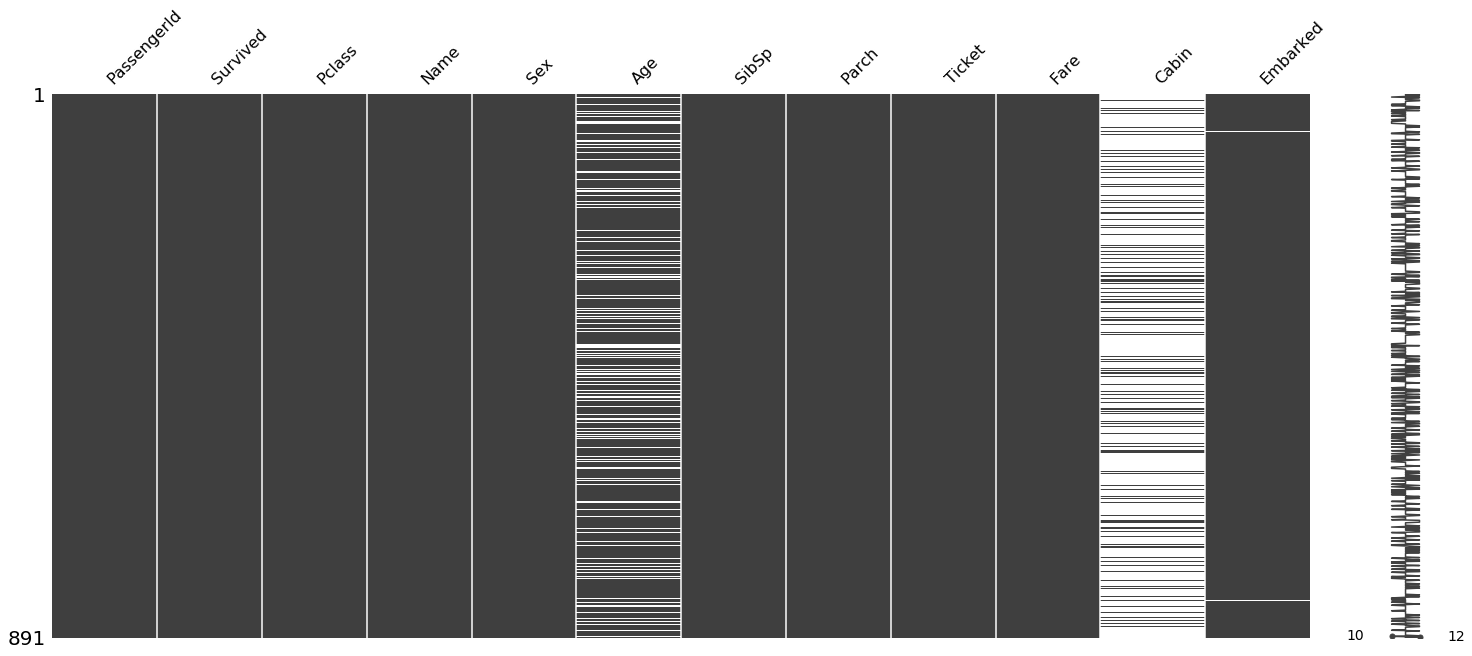

In [6]:
import missingno as ms
ms.matrix(train)

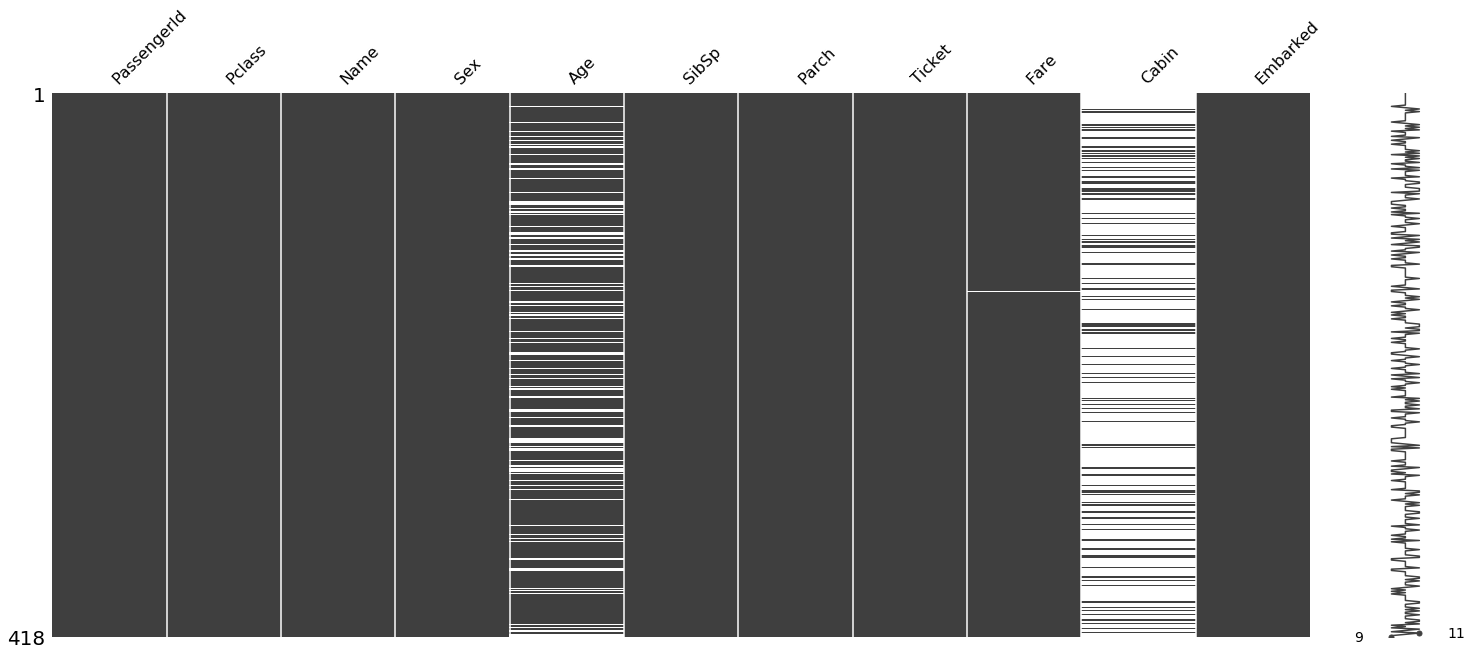

In [7]:
ms.matrix(test)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
 test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train.describe(include=['O']) #Checking type Objects

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dick, Mrs. Albert Adrian (Vera Gillespie)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [13]:
train[['Pclass', 'Survived']].groupby(by='Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# EDA

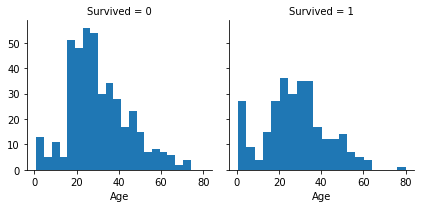

In [16]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

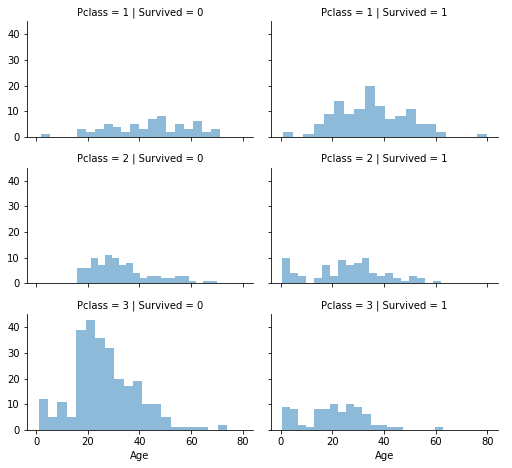

In [17]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

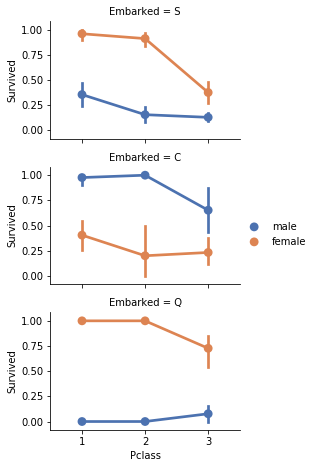

In [222]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

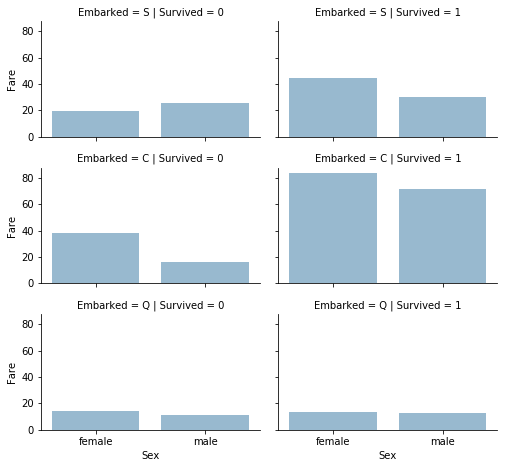

In [223]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

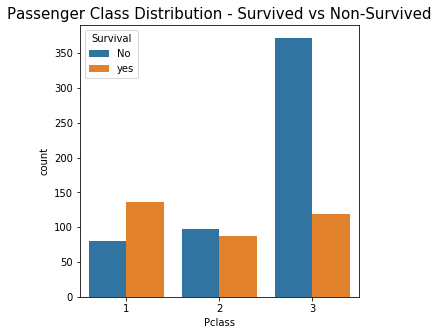

In [283]:
plt.subplots(figsize = (5,5))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

([<matplotlib.axis.XTick at 0x1a39705ac8>,
 <a list of 3 Text xticklabel objects>)

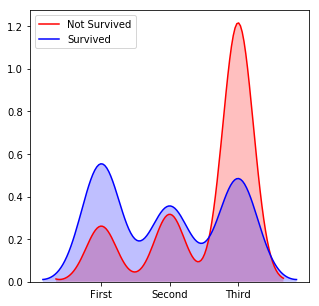

In [284]:
plt.subplots(figsize=(5,5))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

Text(0.5, 0, 'Fare')

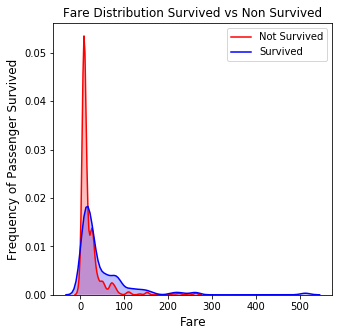

In [241]:
plt.subplots(figsize=(5,5))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=12)
plt.ylabel('Frequency of Passenger Survived',fontsize=12)
plt.xlabel('Fare',fontsize=12)

In [18]:
# As We can see Ticket and cabin are not useful, as ticket number dont have any revealance, and cabin has missing vals
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [19]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
def changeit(dataset):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    return dataset['Title']
train['Title'] = changeit(train)
test['Title'] = changeit(test)

In [21]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
# Lets Map the Title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
def mapthem(dataset):
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    return dataset['Title']
train['Title'] = mapthem(train)
test['Title'] = mapthem(test)


In [23]:
# Now safe to remove Name
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name', 'PassengerId'], axis=1)

In [24]:
combine = [train, test]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [25]:
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age2']=new.T


In [26]:
new=Imp.fit_transform(test.Age.values.reshape(1,-1))
test['Age2']=new.T

In [27]:
train.Embarked[train.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age2
0,0,3,0,22.0,1,0,7.2500,S,1,22.0
1,1,1,1,38.0,1,0,71.2833,C,3,38.0
2,1,3,1,26.0,0,0,7.9250,S,2,26.0
3,1,1,1,35.0,1,0,53.1000,S,3,35.0
4,0,3,0,35.0,0,0,8.0500,S,1,35.0


In [29]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
Age2         0
dtype: int64

In [30]:
train.Embarked.value_counts()
train.Embarked.fillna("S", inplace = True)
test.Fare.fillna(test.Fare.mean(), inplace = True)

In [31]:
train.isnull().sum()
# test.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Age2          0
dtype: int64

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age2
0,0,3,0,22.0,1,0,7.2500,S,1,22.0
1,1,1,1,38.0,1,0,71.2833,C,3,38.0
2,1,3,1,26.0,0,0,7.9250,S,2,26.0
3,1,1,1,35.0,1,0,53.1000,S,3,35.0
4,0,3,0,35.0,0,0,8.0500,S,1,35.0


In [33]:
dataset = [train, test]
for dataset in combine:    
    dataset.loc[ dataset['Age2'] <= 16, 'Age2'] = 0
    dataset.loc[(dataset['Age2'] > 16) & (dataset['Age2'] <= 32), 'Age2'] = 1
    dataset.loc[(dataset['Age2'] > 32) & (dataset['Age2'] <= 48), 'Age2'] = 2
    dataset.loc[(dataset['Age2'] > 48) & (dataset['Age2'] <= 64), 'Age2'] = 3
    dataset.loc[ dataset['Age2'] > 64, 'Age2']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age2
0,0,3,0,22.0,1,0,7.2500,S,1,1.0
1,1,1,1,38.0,1,0,71.2833,C,3,2.0
2,1,3,1,26.0,0,0,7.9250,S,2,1.0
3,1,1,1,35.0,1,0,53.1000,S,3,2.0
4,0,3,0,35.0,0,0,8.0500,S,1,2.0


In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age2
0,3,0,34.5,0,0,7.8292,Q,1,2.0
1,3,1,47.0,1,0,7.0000,S,3,2.0
2,2,0,62.0,0,0,9.6875,Q,1,3.0
3,3,0,27.0,0,0,8.6625,S,1,1.0
4,3,1,22.0,1,1,12.2875,S,3,1.0


In [35]:
test = test.drop("Age", axis = 1)
train = train.drop("Age", axis = 1)

In [36]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age2
0,0,3,0,1,0,7.2500,S,1,1.0
1,1,1,1,1,0,71.2833,C,3,2.0
2,1,3,1,0,0,7.9250,S,2,1.0
3,1,1,1,1,0,53.1000,S,3,2.0
4,0,3,0,0,0,8.0500,S,1,2.0


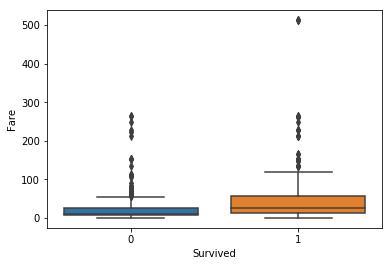

In [37]:
sns.boxplot(x='Survived', y= "Fare", data=train)

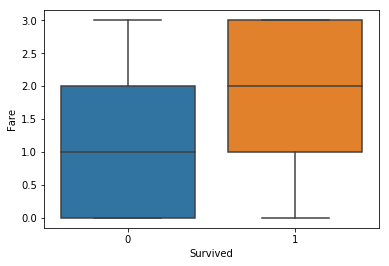

In [38]:
combine = [train, test]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train, test]
sns.boxplot(x='Survived', y= "Fare", data=train)

In [39]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,Age2
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.295875,0.407753,-0.065770
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.628459,-0.173929,-0.112962
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.248940,0.502713,-0.086111
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.394248,0.269623,-0.065076
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.393048,0.315784,-0.041678
Fare,0.295875,-0.628459,0.248940,0.394248,0.393048,1.000000,0.341665,0.022975
Title,0.407753,-0.173929,0.502713,0.269623,0.315784,0.341665,1.000000,-0.042880
Age2,-0.065770,-0.112962,-0.086111,-0.065076,-0.041678,0.022975,-0.042880,1.000000


In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
                                                                                             

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [43]:
combine = [train, test]

In [44]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age2,IsAlone
0,0,3,0,0,S,1,1.0,0
1,1,1,1,3,C,3,2.0,0
2,1,3,1,1,S,2,1.0,1
3,1,1,1,3,S,3,2.0,0
4,0,3,0,1,S,1,2.0,1


In [45]:
test.head()

,Pclass,Sex,Fare,Embarked,Title,Age2,IsAlone
0,3,0,0,Q,1,2.0,1
1,3,1,0,S,3,2.0,0
2,2,0,1,Q,1,3.0,1
3,3,0,1,S,1,1.0,1
4,3,1,1,S,3,1.0,0


In [256]:
test.head()

,Pclass,Sex,Fare,Embarked,Title,Age2,IsAlone,pSex
0,3,0,0,2,1,2.0,1,0
1,3,1,0,0,3,2.0,0,3
2,2,0,1,2,1,3.0,1,0
3,3,0,1,0,1,1.0,1,0
4,3,1,1,0,3,1.0,0,3


In [47]:
combine = [train, test]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [49]:
# Feature Engineering

In [310]:
test.head()

,Pclass,Sex,Fare,Embarked,Title,Age2,IsAlone,Age*Class,newfeat,newTitle
0,3,0,0,2,1,2.0,1,6.0,0,6.0
1,3,1,0,0,3,2.0,0,6.0,0,18.0
2,2,0,1,2,1,3.0,1,6.0,1,6.0
3,3,0,1,0,1,1.0,1,3.0,1,3.0
4,3,1,1,0,3,1.0,0,3.0,0,9.0


In [303]:
combine = [train, test]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age2 * dataset.Pclass


In [82]:
# Women from first class and Sex = Female Survived the most
train["pSex"] = train["Sex"] * train["Pclass"]

In [86]:
test["pSex"] = test["Sex"] * test["Pclass"]

In [308]:
train["newTitle"] = train["Age*Class"] * train["Title"]
test["newTitle"] = test["Age*Class"] * test["Title"]

In [305]:
train["newfeat"] = train["Fare"] * train["IsAlone"] 
test["newfeat"] = test["Fare"] * test["IsAlone"]

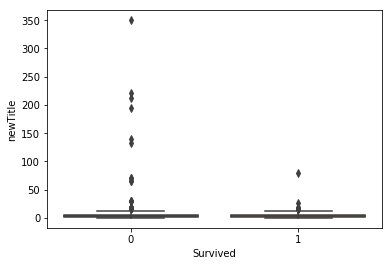

In [309]:
sns.boxplot(x='Survived', y= "newTitle", data=train)

In [119]:
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, Y_train, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()
    val_score = np.round(val_score*100, 2)
    return val_score

In [258]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [259]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.56

In [260]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.61

In [261]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85

In [262]:
a = val_score(knn)
a

81.49

In [263]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.23

In [264]:
??decision_tree

In [265]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.98

In [266]:
a = val_score(decision_tree)
a

81.04

In [75]:
??random_forest

In [269]:
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.98

In [270]:
a = val_score(random_forest)
a

81.49

In [271]:

xgb = XGBClassifier(n_estimators=1500, n_depth = 15)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_random_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_random_xgb

86.2

In [272]:
a = val_score(xgb)
a

82.05

In [273]:
lgbm = LGBMClassifier(n_estimators=100)
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
lgbm.score(X_train, Y_train)
acc_random_lgbm = round(lgbm.score(X_train, Y_train) * 100, 2)
acc_random_lgbm

86.08

In [274]:
a = val_score(lgbm)
a

82.39

In [182]:
ct = CatBoostClassifier(iterations=10, learning_rate=1, depth=7)
ct.fit(X_train, Y_train)
Y_pred = ct.predict(X_test)
ct.score(X_train, Y_train)
acc_random_ct = round(ct.score(X_train, Y_train) * 100, 2)
acc_random_ct

0:	learn: 0.4538795	total: 35.3ms	remaining: 318ms
1:	learn: 0.4132134	total: 57ms	remaining: 228ms
2:	learn: 0.4005790	total: 60.1ms	remaining: 140ms
3:	learn: 0.3865730	total: 63.3ms	remaining: 94.9ms
4:	learn: 0.3807441	total: 65.7ms	remaining: 65.7ms
5:	learn: 0.3759459	total: 68.2ms	remaining: 45.5ms
6:	learn: 0.3666798	total: 71ms	remaining: 30.4ms
7:	learn: 0.3636796	total: 73.3ms	remaining: 18.3ms
8:	learn: 0.3590853	total: 76.1ms	remaining: 8.46ms
9:	learn: 0.3569531	total: 78.7ms	remaining: 0us


85.41

In [183]:
a = val_score(ct)
a

81.6

In [278]:
clf=RandomForestClassifier(n_estimators=1500, max_depth=10)
stack_clf = StackingClassifier(classifiers=[decision_tree,lgbm, xgb], meta_classifier=clf)
stack_clf.fit(X_train, Y_train)
# predict_y = stack_clf.predict(X_train)
stack_clf.score(X_train, Y_train)

0.8698092031425365

In [279]:
a = val_score(stack_clf)
a

81.38

In [372]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree', 'XGBClassifier', 'LGBMClassifier','CatBoostClassifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, 
              acc_linear_svc, acc_decision_tree,acc_random_xgb, acc_random_lgbm, acc_random_ct]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.98
5,Decision Tree,86.98
8,CatBoostClassifier,86.87
7,LGBMClassifier,86.76
6,XGBClassifier,86.08
1,KNN,85.41
0,Support Vector Machines,83.61
2,Logistic Regression,78.56
4,Linear SVC,78.23


In [298]:
Y_pred = random_forest.predict(X_test)

In [242]:
test_passen = pd.read_csv("./Data/test.csv")

In [229]:
test["PassengerId"] = test_passen["PassengerId"]

In [300]:
submission = pd.DataFrame({
        "PassengerId": test_passen["PassengerId"],
        "Survived": Y_pred
    })

In [299]:
(submission.Survived - Y_pred).sum()

-7

In [301]:
submission.to_csv('./submission.csv', index=False)